<a href="https://colab.research.google.com/github/EastbayML/pytorch_tutorial/blob/master/pytorch_tutorial2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST in Pytorch 

This notebook demonstrates how we can implement Fashion-MNIST in Pytorch.  This implementation illustrates how we use:


*   torch
*   torch.nn - Neural Network
*   torch.optim - Optimizers
*   torchvision - Neural Netwoks for Computer Vision

*This code is largely based on this tutorial:https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html* and the code in https://github.com/pytorch/examples/blob/master/mnist/main.py

In [0]:
# Imports

# pyplot is plotting.  numpy is our best friend
import matplotlib.pyplot as plt
import numpy as np

# torch is general torch, torchvision is vision NN layers and utilities
#   .transforms is routine that transform vision data
import torch
import torchvision
import torchvision.transforms as transforms

# We are going to use torch NN libraries, functional API (keras-like), and optimizer
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



In [0]:
# Parameters
num_epochs = 25
batch_size = 100
learning_rate = 0.001


## Load the Data

We first need to load the data.  We could do this from files.  But **torchvision** has a dataset class that supports loading of data for specific well-know models like Fashion-MNIST. And by using this dataset library we do not have to update this code if the data location changes.

Notice that we set the batch size in the DataLoader

In [5]:
# Define transform with to tensor and normalizer.  We normalize each channel
#  values to -1.0 to 1.0 via image = (image - mean)/std.  
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
# Download and transform the Fashion-MNIST training and testing datasets
train_data = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,    # true for training data
    transform=transform)
test_data = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,   # false for test data
    transform=transform)

# Define Loaders for training and evaluating with the training and test datasets
#  num_workers = 2 runs 2 subprocesses to speed the loading
train_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size, 
                                           shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           shuffle=False, num_workers=2)



Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


## Show sample data

Show some sample data images, so we understand the data.

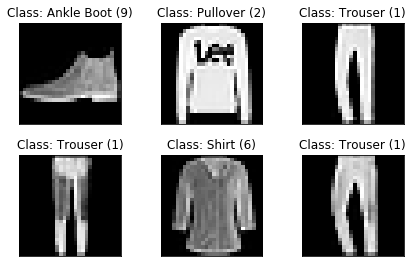

In [6]:
# Define class label names for displaying.  Class labels are [0,1,2,...,9] and these
#  labels are match class to position.  So class=0 => 'T-shirt/top', class=1 => 'Trousers'
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


# show some images from the Test dataset
test_data = enumerate(test_loader)
# get the first batch of images.  data is a list of [inputs, labels].  
#  inputs are pixels, class labels are integers
batch_idx, (inputs, labels)  = next(test_data)
#  Display list of images and their class labels

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(inputs[i][0], cmap='gray', interpolation='none')
  plt.title("Class: " + classes[labels[i].item()] + " (" + str(labels[i].item()) + ")")
  # Supress x and y tickmarks for x and y pixel positions
  plt.xticks([])   
  plt.yticks([])


## Define the Model

We define our model here.  Feel free to experiment with the model structure.  Even a linear model of 2 layers will work with the MNIST data.  But, it probably will not perform that well.  But give it a try!! 

Notice the forward() method connects each layer to the next.  Read up on nn.Sequeunce and see if that works.  For Keras
users, nn.Sequence is like the Keras Sequential modeand this code is like the Keras API.

In [0]:
#  Define NN Model class
class Model(nn.Module):

  # Define the layers
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

  # Hook up layers for the foward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create instance of NN Model
model = Model()



When we train we use the loss criterion to measure loss, and the optimizer method to reduce loss.

Our items are one of the 10 classes of fashion items.  CrossEntropyLoss shows how poorly our model is doing at predicting each of the classes.

The optimizer will adjust parameters (weights) in the model to minimuze this loss.

In [0]:
# Define loss criterion and optimizer method
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

##  Train the model 

We calculate a loss for each epoch

In [9]:
for epoch in range(num_epochs):  # loop over the dataset multiple times
    num_items = 0
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        num_items += 1
        
    print('Train Epoch: {}   Loss: {:.6f}'.format(
                epoch, running_loss/num_items ))        

print('Finished Training')

Train Epoch: 0   Loss: 1.994516
Train Epoch: 1   Loss: 0.794379
Train Epoch: 2   Loss: 0.657320
Train Epoch: 3   Loss: 0.597795
Train Epoch: 4   Loss: 0.554518
Train Epoch: 5   Loss: 0.521426
Train Epoch: 6   Loss: 0.495428
Train Epoch: 7   Loss: 0.474494
Train Epoch: 8   Loss: 0.457578
Train Epoch: 9   Loss: 0.437852
Train Epoch: 10   Loss: 0.424577
Train Epoch: 11   Loss: 0.410506
Train Epoch: 12   Loss: 0.399496
Train Epoch: 13   Loss: 0.386623
Train Epoch: 14   Loss: 0.376964
Train Epoch: 15   Loss: 0.370758
Train Epoch: 16   Loss: 0.358193
Train Epoch: 17   Loss: 0.353756
Train Epoch: 18   Loss: 0.346071
Train Epoch: 19   Loss: 0.341347
Train Epoch: 20   Loss: 0.333822
Train Epoch: 21   Loss: 0.329309
Train Epoch: 22   Loss: 0.324371
Train Epoch: 23   Loss: 0.318503
Train Epoch: 24   Loss: 0.314000
Finished Training


## Evaluate the trained model's performance on Testing Data

Of course, once we have the model trained, we want to evaluate it's performance. That is why separate training from testing/evaluation data.  And we never train with the testing/evaluation data.

So now we will use this testing/evaluation data to see how well our trained model does on data it was **not** trained on.

Notice we first use model.eval().  This will model.eval() will notify all layers that you are in eval mode, and that way, batchnorm or dropout layers will work in eval mode instead of training mode.  (https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615)

In [10]:
# Evaluate trained model's performance on Testing data
  model.eval()          # Set model to evaluation mode
  test_loss = 0
  correct = 0
  with torch.no_grad(): # Turn off gradient computation
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)

  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



Test set: Average loss: -9.3579, Accuracy: 8688/10000 (87%)



## Things to try

*   Adjust batch_size and other parameters
*   Alter the model with different layers and/or layer parameters 
*   Add support for GPU
*   Replace model definition with nn.Sequential() 

